Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

C:\Users\twandkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 250)

Read the Dataset

In [3]:
googleappdata = pd.read_csv("googleplaystore.csv",sep=',')

Step 1: Describe the Dataset

In [4]:
## Check the dimension of the dataset
print("Dimesion of the dataset:", googleappdata.shape)
print("No of rows:", googleappdata.shape[0])
print("No of cols:", googleappdata.shape[1])

Dimesion of the dataset: (10841, 13)
No of rows: 10841
No of cols: 13


In [5]:
## Check the features
print("Features of the dataset:\n",googleappdata.columns)

Features of the dataset:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [5]:
## Check the datatype and information of the data
googleappdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
## Preview the dataset
googleappdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
#appdata.iloc[5]

In [7]:
## Check if there are any missing values
googleappdata.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Step 2: Clean the Dataset

In [4]:
## lets drop the rows containing missing values in content rating, current version, android version, type cols
googleappdata.dropna(axis=0,inplace=True,subset=['Android Ver','Current Ver','Type','Content Rating'])

In [4]:
## Check if there are any other missing values
googleappdata.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [10]:
## Check rows having missing values in Rating
googleappdata[googleappdata['Rating'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [11]:
## Statistics of Rating cols
googleappdata.Rating.describe()
## "We can impute with mean value 4.19"

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [5]:
## Missing value imputation of Rating coloumn
mean_r = round(googleappdata.Rating.mean(),2)
googleappdata['Rating']=googleappdata['Rating'].fillna(mean_r)
print("Checking if there are any missing values:\n",googleappdata.Rating.isna().sum())

Checking if there are any missing values:
 0


In [6]:
## Lets make a copy for all cleaning and transformation
df_appdata = googleappdata

In [9]:
## Univariate Analysis
## Lets look at CATEGORY column
print("No of unique categories:",df_appdata.Category.nunique())
print("List of unique categories:\n",df_appdata.Category.unique())

No of unique categories: 33
List of unique categories:
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [7]:
## Frequency distribution of Category
fq=df_appdata.Category.value_counts()
ptg=round(((df_appdata.Category.value_counts())/df_appdata.shape[0])*100,2)
fqtble = pd.DataFrame({'Frequency':fq,'Percentage':ptg})
fqtble

,Frequency,Percentage
FAMILY,1968,18.17
GAME,1144,10.56
TOOLS,841,7.77
MEDICAL,463,4.28
BUSINESS,460,4.25
PRODUCTIVITY,424,3.92
PERSONALIZATION,390,3.60
COMMUNICATION,387,3.57
SPORTS,384,3.55
LIFESTYLE,382,3.53


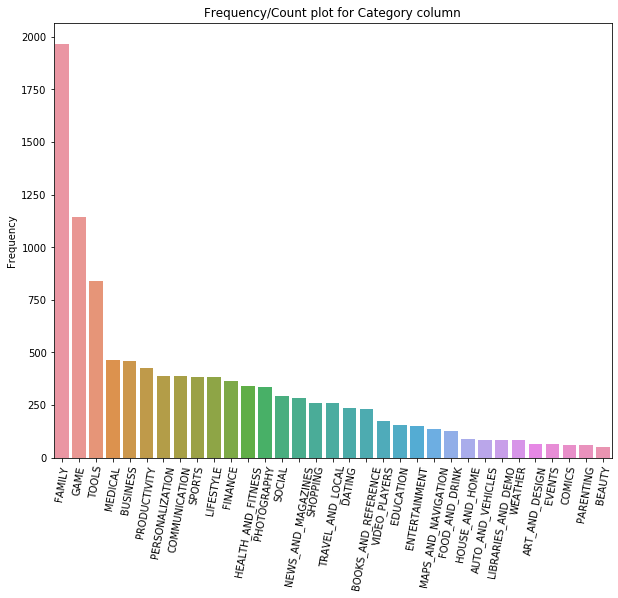

In [16]:
## Plotting the Category frequency
plt.figure(figsize=(10,8))
ax=sns.barplot(x=fqtble.index,y=fqtble.Frequency,data=fqtble)
plt.title("Frequency/Count plot for Category column")
plt.xticks(rotation=80)
plt.show()

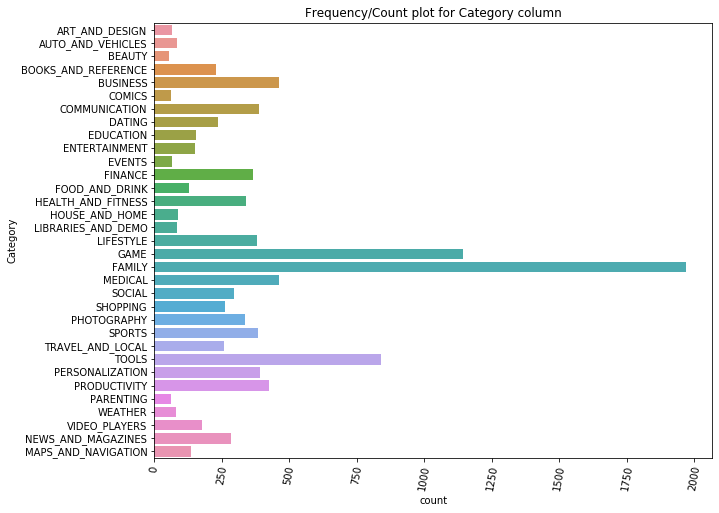

In [17]:
## Alternate way of Plotting the Category frequency
plt.figure(figsize=(10,8))
ax=sns.countplot(y='Category',data=df_appdata)
plt.title("Frequency/Count plot for Category column")
plt.xticks(rotation=80)
plt.show()

In [8]:
## One hot encoding for category variable
df_appdata1=df_appdata
oh = pd.get_dummies(df_appdata1['Category'],prefix='CTG')
oh=oh.drop('CTG_BEAUTY',axis = 1)
df_appdata1=pd.concat([df_appdata1,oh],axis=1)
df_appdata1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,CTG_ART_AND_DESIGN,CTG_AUTO_AND_VEHICLES,CTG_BOOKS_AND_REFERENCE,CTG_BUSINESS,CTG_COMICS,CTG_COMMUNICATION,CTG_DATING,CTG_EDUCATION,CTG_ENTERTAINMENT,CTG_EVENTS,CTG_FAMILY,CTG_FINANCE,CTG_FOOD_AND_DRINK,CTG_GAME,CTG_HEALTH_AND_FITNESS,CTG_HOUSE_AND_HOME,CTG_LIBRARIES_AND_DEMO,CTG_LIFESTYLE,CTG_MAPS_AND_NAVIGATION,CTG_MEDICAL,CTG_NEWS_AND_MAGAZINES,CTG_PARENTING,CTG_PERSONALIZATION,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,CTG_SHOPPING,CTG_SOCIAL,CTG_SPORTS,CTG_TOOLS,CTG_TRAVEL_AND_LOCAL,CTG_VIDEO_PLAYERS,CTG_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
## lets look at Rating coloumn
df_appdata1.Rating.describe()
## we can see max and min rating, and 75% of data have values <=4.5

count    10829.000000
mean         4.191588
std          0.479038
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

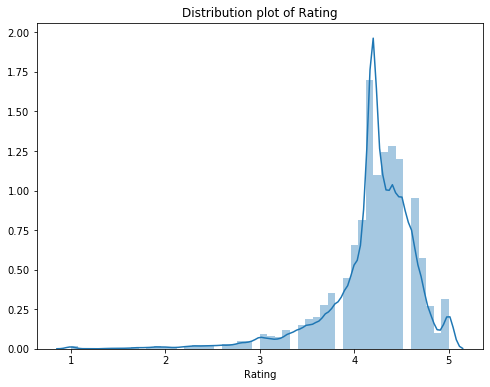

In [20]:
## Lets plot distribution plot of Rating col
plt.figure(figsize=(8,6))
sns.distplot(df_appdata1.Rating)
plt.title("Distribution plot of Rating")
plt.show()

In [9]:
## lets look at Review column
print("Datatype of Reviews:",df_appdata1.Reviews.dtype)
## Lets convert object to float/int 
df_appdata1['Reviews']=df_appdata1['Reviews'].astype('int64')
print("Datatype pf Reviews after conversion:",df_appdata1.Reviews.dtype)
print("Description of Review coloum:\n",df_appdata1.Reviews.describe())

Datatype of Reviews: object
Datatype pf Reviews after conversion: int64
Description of Review coloum:
 count    1.082900e+04
mean     4.446018e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.100000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64


In [10]:
### lets look at Size column now
### We need to remove 'M' and 'k'and convert them to numeric values.
def SizePreprocess(size):
    lists = []
    for item in size:
        if item[-1]=='M':
            item=float(item[:-1])
            lists.append(item)
        elif item[-1]=='k':
            item=item[:-1]
            item=float(item)/1000
            lists.append(item)
        else:
            lists.append(21.5)  ## imputing the mean of ratings
    return lists

In [11]:
df_appdata2=df_appdata1

In [12]:
float(df_appdata2.Size[1][:-1])*1000

14000.0

In [13]:
### Preprocessing the size column
d=pd.DataFrame(df_appdata2['Size'])
df_appdata2['Newsize']=d.apply(SizePreprocess)
df_appdata2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,CTG_ART_AND_DESIGN,CTG_AUTO_AND_VEHICLES,CTG_BOOKS_AND_REFERENCE,CTG_BUSINESS,CTG_COMICS,CTG_COMMUNICATION,CTG_DATING,CTG_EDUCATION,CTG_ENTERTAINMENT,CTG_EVENTS,CTG_FAMILY,CTG_FINANCE,CTG_FOOD_AND_DRINK,CTG_GAME,CTG_HEALTH_AND_FITNESS,CTG_HOUSE_AND_HOME,CTG_LIBRARIES_AND_DEMO,CTG_LIFESTYLE,CTG_MAPS_AND_NAVIGATION,CTG_MEDICAL,CTG_NEWS_AND_MAGAZINES,CTG_PARENTING,CTG_PERSONALIZATION,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,CTG_SHOPPING,CTG_SOCIAL,CTG_SPORTS,CTG_TOOLS,CTG_TRAVEL_AND_LOCAL,CTG_VIDEO_PLAYERS,CTG_WEATHER,Newsize
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8


In [14]:
x = df_appdata2[df_appdata2['Newsize']!=0]['Newsize']
x.mean()

21.52948882629965

In [15]:
## Size stats
df_appdata2.Newsize.describe()
## minimum size=0 and max=100, average size of any app is 18Mb

count    10829.000000
mean        21.529489
std         20.751194
min          0.008500
25%          5.900000
50%         18.000000
75%         26.000000
max        100.000000
Name: Newsize, dtype: float64

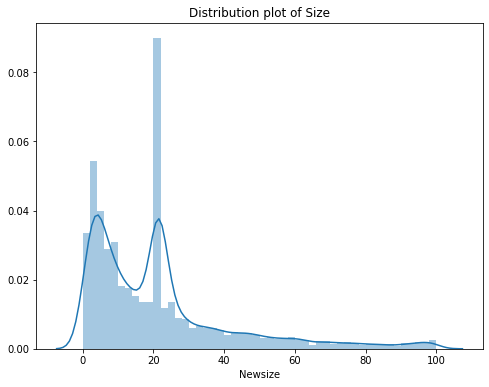

In [28]:
## distribution plot of Size
plt.figure(figsize=(8,6))
sns.distplot(df_appdata2.Newsize)
plt.title("Distribution plot of Size")
plt.show()

In [14]:
df_appdata2['Size'].value_counts() ##Since Varies with device is 1694, we might have to impute mean size

Varies with device    1694
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
186k                     1
420k                     1
50k                      1
478k                     1
714k                     1
Name: Size, Length: 457, dtype: int64

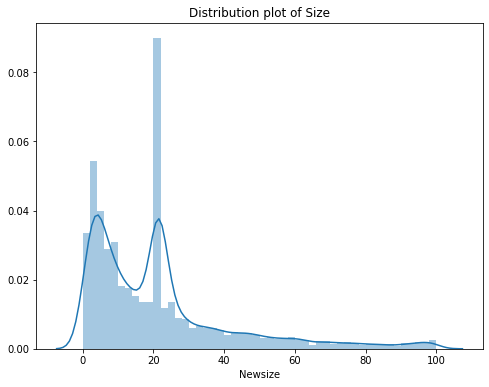

In [30]:
## distribution plot of Size
plt.figure(figsize=(8,6))
sns.distplot(df_appdata2.Newsize)
plt.title("Distribution plot of Size")
plt.show()

In [16]:
## Lets deal with Installs col now
df_appdata3=df_appdata2
print("Number of unique values in Installs:",df_appdata3['Installs'].nunique())
print("Values in Installs:",df_appdata3['Installs'].unique())

Number of unique values in Installs: 20
Values in Installs: ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+']


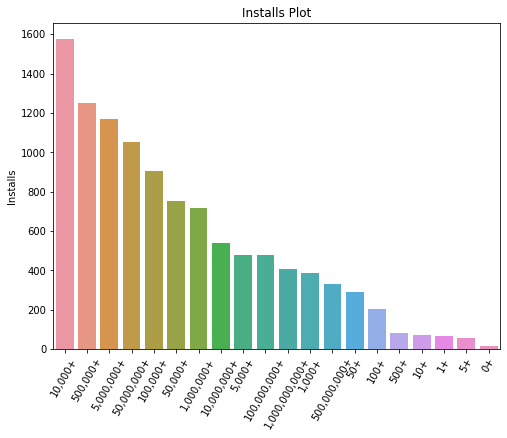

In [32]:
## Bar graph to look at Installs
plt.figure(figsize=(8,6))
sns.barplot(x=df_appdata3['Installs'].unique(),y=df_appdata3['Installs'].value_counts())
plt.title("Installs Plot")
plt.xticks(rotation =60)
plt.show()

In [16]:
df_appdata3.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'CTG_ART_AND_DESIGN', 'CTG_AUTO_AND_VEHICLES',
       'CTG_BOOKS_AND_REFERENCE', 'CTG_BUSINESS', 'CTG_COMICS',
       'CTG_COMMUNICATION', 'CTG_DATING', 'CTG_EDUCATION', 'CTG_ENTERTAINMENT',
       'CTG_EVENTS', 'CTG_FAMILY', 'CTG_FINANCE', 'CTG_FOOD_AND_DRINK',
       'CTG_GAME', 'CTG_HEALTH_AND_FITNESS', 'CTG_HOUSE_AND_HOME',
       'CTG_LIBRARIES_AND_DEMO', 'CTG_LIFESTYLE', 'CTG_MAPS_AND_NAVIGATION',
       'CTG_MEDICAL', 'CTG_NEWS_AND_MAGAZINES', 'CTG_PARENTING',
       'CTG_PERSONALIZATION', 'CTG_PHOTOGRAPHY', 'CTG_PRODUCTIVITY',
       'CTG_SHOPPING', 'CTG_SOCIAL', 'CTG_SPORTS', 'CTG_TOOLS',
       'CTG_TRAVEL_AND_LOCAL', 'CTG_VIDEO_PLAYERS', 'CTG_WEATHER', 'Newsize'],
      dtype='object')

Types of apps are: ['Free' 'Paid']
Freq table for type
       Type  Count
Free  Free  10032
Paid  Paid    797


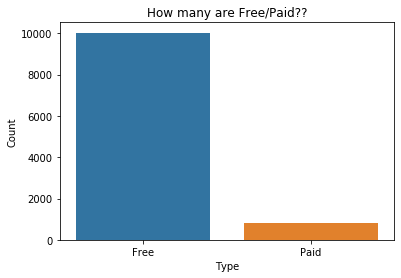

In [17]:
### Lets look at Type coloumn
print("Types of apps are:",df_appdata3['Type'].unique())
df= pd.DataFrame({'Type':df_appdata3['Type'].unique(), 'Count':df_appdata3['Type'].value_counts()})
print("Freq table for type\n",df)
plt.figure(figsize=(6,4))
sns.barplot(x=df['Type'],y=df['Count'])
plt.title("How many are Free/Paid??")
plt.show()
## Most of the apps are free

In [18]:
### Label encoding Type Coloumn
df_appdata4 = df_appdata3
labelencoder = preprocessing.LabelEncoder()
df_appdata4['TypeEN']= labelencoder.fit_transform(df_appdata4['Type'])
print("Label encoded types are\n:",df_appdata4['TypeEN'].unique())

Label encoded types are
: [0 1]


In [22]:
## Lets look at the Price coloumn
## As most of the apps are free, the Price of the app will be 0(10032 values are 0 which matches with free type count)
df=pd.DataFrame({'Price':df_appdata3['Price'].unique(),'Count': df_appdata3['Price'].value_counts()})
df.head()

,Price,Count
0,0,10032
$0.99,$4.99,146
$2.99,$3.99,129
$1.99,$6.99,73
$4.99,$1.49,72


In [19]:
## Clean the Price column. Remove the dollar sign from the price and convert the type tp float
df_appdata5=df_appdata4
df_appdata5['NewPrice']=df_appdata4['Price'].str.replace('$','') 
print("New values of Price are\n:",df_appdata5['NewPrice'].unique())
print("Datatype of Price before conversion:",df_appdata5['NewPrice'].dtype)
df_appdata5['NewPrice'] = df_appdata5['NewPrice'].astype('float')
print("Datatype of Price after conversion:",df_appdata5['NewPrice'].dtype)

New values of Price are
: ['0' '4.99' '3.99' '6.99' '1.49' '2.99' '7.99' '5.99' '3.49' '1.99' '9.99'
 '7.49' '0.99' '9.00' '5.49' '10.00' '24.99' '11.99' '79.99' '16.99'
 '14.99' '1.00' '29.99' '12.99' '2.49' '10.99' '1.50' '19.99' '15.99'
 '33.99' '74.99' '39.99' '3.95' '4.49' '1.70' '8.99' '2.00' '3.88' '25.99'
 '399.99' '17.99' '400.00' '3.02' '1.76' '4.84' '4.77' '1.61' '2.50'
 '1.59' '6.49' '1.29' '5.00' '13.99' '299.99' '379.99' '37.99' '18.99'
 '389.99' '19.90' '8.49' '1.75' '14.00' '4.85' '46.99' '109.99' '154.99'
 '3.08' '2.59' '4.80' '1.96' '19.40' '3.90' '4.59' '15.46' '3.04' '4.29'
 '2.60' '3.28' '4.60' '28.99' '2.95' '2.90' '1.97' '200.00' '89.99' '2.56'
 '30.99' '3.61' '394.99' '1.26' '1.20' '1.04']
Datatype of Price before conversion: object
Datatype of Price after conversion: float64


In [22]:
##Lets look at content rating
df_appdata6 = df_appdata5
print("Categories of Content Rating are:", df_appdata6['Content Rating'].unique())
CRdummies = pd.get_dummies(df_appdata6['Content Rating'],prefix='CR')
CRdummies= CRdummies.drop('CR_Unrated',axis=1)
df_appdata6= pd.concat([df_appdata6,CRdummies],axis=1)
df_appdata6.head()

Categories of Content Rating are: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,CTG_ART_AND_DESIGN,CTG_AUTO_AND_VEHICLES,CTG_BOOKS_AND_REFERENCE,CTG_BUSINESS,CTG_COMICS,CTG_COMMUNICATION,CTG_DATING,CTG_EDUCATION,CTG_ENTERTAINMENT,CTG_EVENTS,CTG_FAMILY,CTG_FINANCE,CTG_FOOD_AND_DRINK,CTG_GAME,CTG_HEALTH_AND_FITNESS,CTG_HOUSE_AND_HOME,CTG_LIBRARIES_AND_DEMO,CTG_LIFESTYLE,CTG_MAPS_AND_NAVIGATION,CTG_MEDICAL,CTG_NEWS_AND_MAGAZINES,CTG_PARENTING,CTG_PERSONALIZATION,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,CTG_SHOPPING,CTG_SOCIAL,CTG_SPORTS,CTG_TOOLS,CTG_TRAVEL_AND_LOCAL,CTG_VIDEO_PLAYERS,CTG_WEATHER,Newsize,TypeEN,NewPrice,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,0,0.0,0,1,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0,0,0.0,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,0,0.0,0,1,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0,0,0.0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8,0,0.0,0,1,0,0,0


In [23]:
df_appdata6.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'CTG_ART_AND_DESIGN', 'CTG_AUTO_AND_VEHICLES',
       'CTG_BOOKS_AND_REFERENCE', 'CTG_BUSINESS', 'CTG_COMICS',
       'CTG_COMMUNICATION', 'CTG_DATING', 'CTG_EDUCATION', 'CTG_ENTERTAINMENT',
       'CTG_EVENTS', 'CTG_FAMILY', 'CTG_FINANCE', 'CTG_FOOD_AND_DRINK',
       'CTG_GAME', 'CTG_HEALTH_AND_FITNESS', 'CTG_HOUSE_AND_HOME',
       'CTG_LIBRARIES_AND_DEMO', 'CTG_LIFESTYLE', 'CTG_MAPS_AND_NAVIGATION',
       'CTG_MEDICAL', 'CTG_NEWS_AND_MAGAZINES', 'CTG_PARENTING',
       'CTG_PERSONALIZATION', 'CTG_PHOTOGRAPHY', 'CTG_PRODUCTIVITY',
       'CTG_SHOPPING', 'CTG_SOCIAL', 'CTG_SPORTS', 'CTG_TOOLS',
       'CTG_TRAVEL_AND_LOCAL', 'CTG_VIDEO_PLAYERS', 'CTG_WEATHER', 'Newsize',
       'TypeEN', 'NewPrice', 'CR_Adults only 18+', 'CR_Everyone',
       'CR_Everyone 10+', 'CR_Mature 17+', 'CR_Teen'],
      dtype='object')

How many categories are in the Genres col: 119


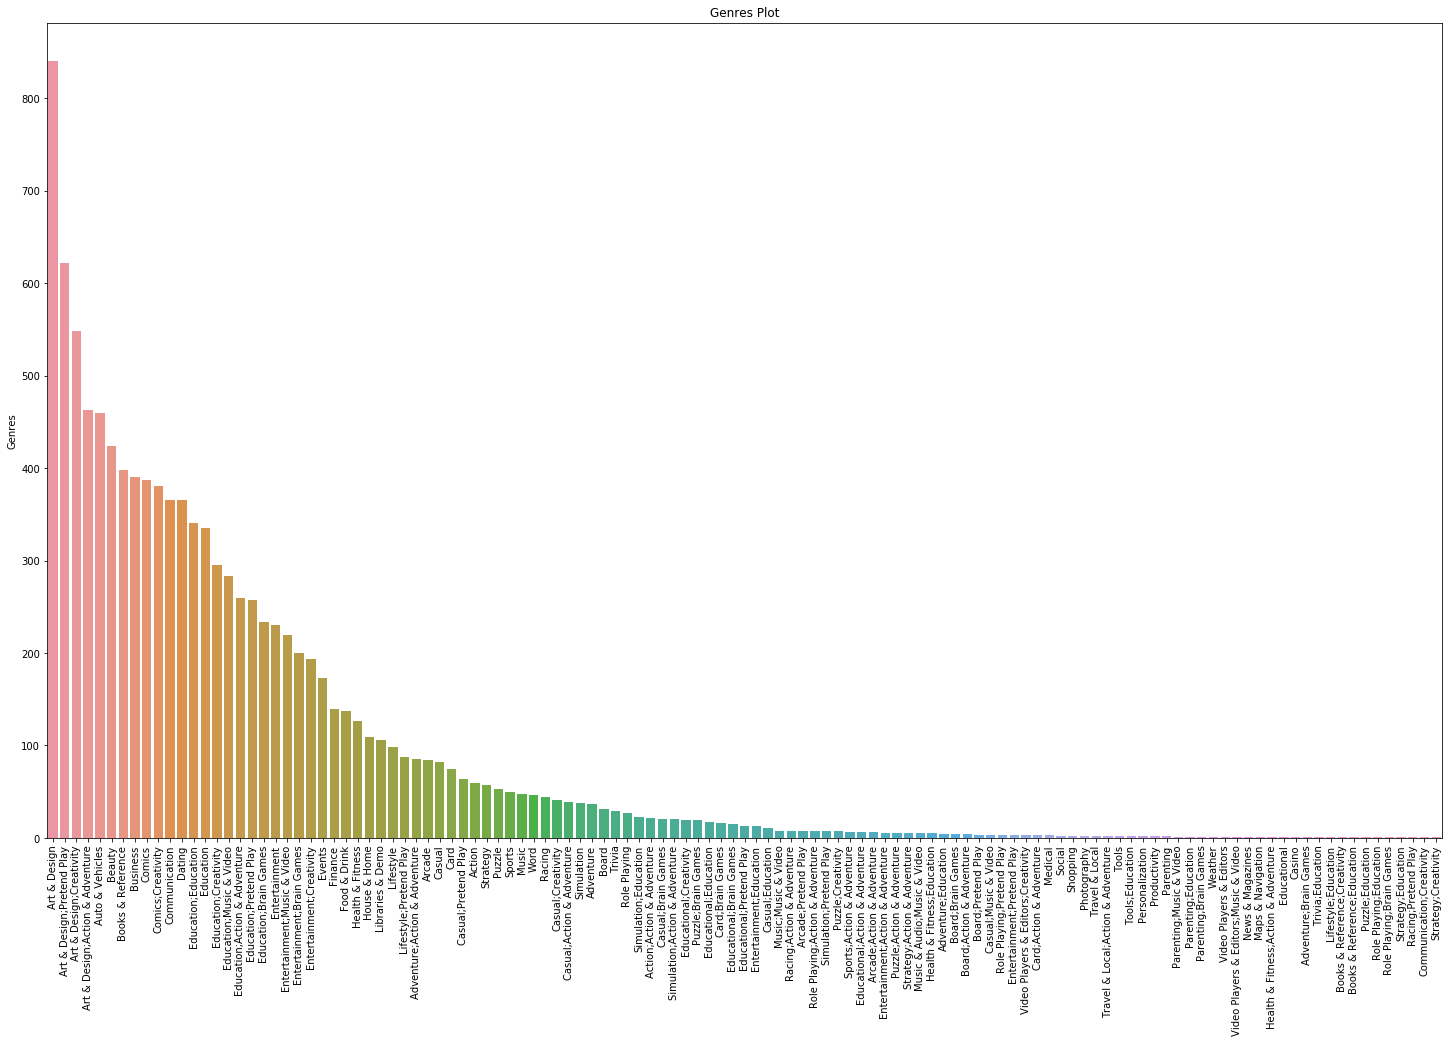

In [24]:
### Looking at Genres coloumn now
print("How many categories are in the Genres col:",df_appdata6.Genres.nunique())
## lets look at some popular Genres
plt.figure(figsize=(25,15))
sns.barplot(x=df_appdata6['Genres'].unique(),y=df_appdata3['Genres'].value_counts())
plt.title("Genres Plot")
plt.xticks(rotation =90)
plt.show()

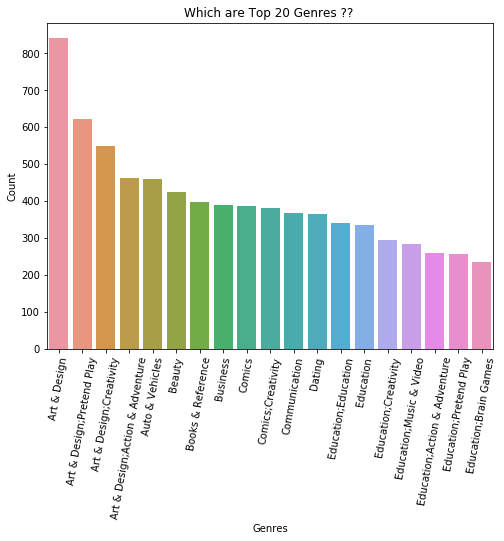

In [25]:
## Which are the Top 20 Genres 
gendf=pd.DataFrame({'Genres':df_appdata6['Genres'].unique(),'Count': df_appdata6['Genres'].value_counts()})
gendf.head()
## Alternate way of Plotting the Category frequency
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Genres',y='Count',data=gendf[0:19])
plt.title("Which are Top 20 Genres ?? ")
plt.xticks(rotation=80)
plt.show()

In [26]:
## Last Updated data
df_appdata7 = df_appdata6
print("Type of this coloumn is :",df_appdata7['Last Updated'].dtype)
## lets convert it into date format
df_appdata7['New Last Updated'] = pd.to_datetime(df_appdata7['Last Updated'])
print("Type after conversion is:", df_appdata7['New Last Updated'].dtype)
df_appdata7['New Last Updated'].head()

Type of this coloumn is : object
Type after conversion is: datetime64[ns]


0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: New Last Updated, dtype: datetime64[ns]

In [27]:
## latest updated app
df_appdata7[df_appdata7['New Last Updated'] == df_appdata7['New Last Updated'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,CTG_ART_AND_DESIGN,CTG_AUTO_AND_VEHICLES,CTG_BOOKS_AND_REFERENCE,CTG_BUSINESS,CTG_COMICS,CTG_COMMUNICATION,CTG_DATING,CTG_EDUCATION,CTG_ENTERTAINMENT,CTG_EVENTS,CTG_FAMILY,CTG_FINANCE,CTG_FOOD_AND_DRINK,CTG_GAME,CTG_HEALTH_AND_FITNESS,CTG_HOUSE_AND_HOME,CTG_LIBRARIES_AND_DEMO,CTG_LIFESTYLE,CTG_MAPS_AND_NAVIGATION,CTG_MEDICAL,CTG_NEWS_AND_MAGAZINES,CTG_PARENTING,CTG_PERSONALIZATION,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,CTG_SHOPPING,CTG_SOCIAL,CTG_SPORTS,CTG_TOOLS,CTG_TRAVEL_AND_LOCAL,CTG_VIDEO_PLAYERS,CTG_WEATHER,Newsize,TypeEN,NewPrice,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,New Last Updated
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,"50,000+",Free,0,Everyone,Tools,"August 8, 2018",1.1.9,4.0.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.6,0,0.00,0,1,0,0,0,2018-08-08
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,"50,000,000+",Free,0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.0,0,0.00,0,0,0,0,1,2018-08-08
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,"1,000,000+",Free,0,Everyone,Shopping,"August 8, 2018",Varies with device,Varies with device,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21.5,0,0.00,0,1,0,0,0,2018-08-08
10718,BankNordik,FINANCE,3.9,28,15M,"5,000+",Free,0,Everyone,Finance,"August 8, 2018",7.3.2,5.0 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,0,0.00,0,1,0,0,0,2018-08-08
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,1,7.99,0,1,0,0,0,2018-08-08


In [28]:
print(df_appdata7['Current Ver'].nunique())
print(df_appdata7['Current Ver'].max())

2831
version 0.994


In [29]:
print(df_appdata7['Android Ver'].nunique())
print(df_appdata7['Android Ver'].max())

33
Varies with device


In [30]:
### lets look at Installs column now
### We need to remove '+' from the string
def InstallsPrep(Installs):
    lists = []
    for item in Installs:
        if item[-1]=='+':
            item=float(item[:-1].replace(',',''))
            lists.append(item)
        else:
            lists.append(item)  ## imputing the mean of ratings
    return lists

In [31]:
### Preprocessing the Installs column
i=pd.DataFrame(df_appdata7['Installs'])
df_appdata7['NewInstalls']=i.apply(InstallsPrep)
df_appdata7.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,CTG_ART_AND_DESIGN,CTG_AUTO_AND_VEHICLES,CTG_BOOKS_AND_REFERENCE,CTG_BUSINESS,CTG_COMICS,CTG_COMMUNICATION,CTG_DATING,CTG_EDUCATION,CTG_ENTERTAINMENT,CTG_EVENTS,CTG_FAMILY,CTG_FINANCE,CTG_FOOD_AND_DRINK,CTG_GAME,CTG_HEALTH_AND_FITNESS,CTG_HOUSE_AND_HOME,CTG_LIBRARIES_AND_DEMO,CTG_LIFESTYLE,CTG_MAPS_AND_NAVIGATION,CTG_MEDICAL,CTG_NEWS_AND_MAGAZINES,CTG_PARENTING,CTG_PERSONALIZATION,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,CTG_SHOPPING,CTG_SOCIAL,CTG_SPORTS,CTG_TOOLS,CTG_TRAVEL_AND_LOCAL,CTG_VIDEO_PLAYERS,CTG_WEATHER,Newsize,TypeEN,NewPrice,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,New Last Updated,NewInstalls
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,0,0.0,0,1,0,0,0,2018-01-07,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0,0,0.0,0,1,0,0,0,2018-01-15,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,0,0.0,0,1,0,0,0,2018-08-01,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0,0,0.0,0,0,0,0,1,2018-06-08,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8,0,0.0,0,1,0,0,0,2018-06-20,100000.0


In [52]:
df_appdata7.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,CTG_ART_AND_DESIGN,CTG_AUTO_AND_VEHICLES,CTG_BOOKS_AND_REFERENCE,CTG_BUSINESS,CTG_COMICS,CTG_COMMUNICATION,CTG_DATING,CTG_EDUCATION,CTG_ENTERTAINMENT,CTG_EVENTS,CTG_FAMILY,CTG_FINANCE,CTG_FOOD_AND_DRINK,CTG_GAME,CTG_HEALTH_AND_FITNESS,CTG_HOUSE_AND_HOME,CTG_LIBRARIES_AND_DEMO,CTG_LIFESTYLE,CTG_MAPS_AND_NAVIGATION,CTG_MEDICAL,CTG_NEWS_AND_MAGAZINES,CTG_PARENTING,CTG_PERSONALIZATION,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,CTG_SHOPPING,CTG_SOCIAL,CTG_SPORTS,CTG_TOOLS,CTG_TRAVEL_AND_LOCAL,CTG_VIDEO_PLAYERS,CTG_WEATHER,Newsize,TypeEN,NewPrice,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,New Last Updated,NewInstalls
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,0,0.0,0,1,0,0,0,2018-01-07,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0,0,0.0,0,1,0,0,0,2018-01-15,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,0,0.0,0,1,0,0,0,2018-08-01,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0,0,0.0,0,0,0,0,1,2018-06-08,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8,0,0.0,0,1,0,0,0,2018-06-20,100000.0


In [53]:
df_appdata7.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'CTG_ART_AND_DESIGN', 'CTG_AUTO_AND_VEHICLES',
       'CTG_BOOKS_AND_REFERENCE', 'CTG_BUSINESS', 'CTG_COMICS',
       'CTG_COMMUNICATION', 'CTG_DATING', 'CTG_EDUCATION', 'CTG_ENTERTAINMENT',
       'CTG_EVENTS', 'CTG_FAMILY', 'CTG_FINANCE', 'CTG_FOOD_AND_DRINK',
       'CTG_GAME', 'CTG_HEALTH_AND_FITNESS', 'CTG_HOUSE_AND_HOME',
       'CTG_LIBRARIES_AND_DEMO', 'CTG_LIFESTYLE', 'CTG_MAPS_AND_NAVIGATION',
       'CTG_MEDICAL', 'CTG_NEWS_AND_MAGAZINES', 'CTG_PARENTING',
       'CTG_PERSONALIZATION', 'CTG_PHOTOGRAPHY', 'CTG_PRODUCTIVITY',
       'CTG_SHOPPING', 'CTG_SOCIAL', 'CTG_SPORTS', 'CTG_TOOLS',
       'CTG_TRAVEL_AND_LOCAL', 'CTG_VIDEO_PLAYERS', 'CTG_WEATHER', 'Newsize',
       'TypeEN', 'NewPrice', 'CR_Adults only 18+', 'CR_Everyone',
       'CR_Everyone 10+', 'CR_Mature 17+', 'CR_Teen', 'New Last Updated',
     

C:\Users\twandkar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\twandkar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 1, 'Pair Plot of Google App Data')

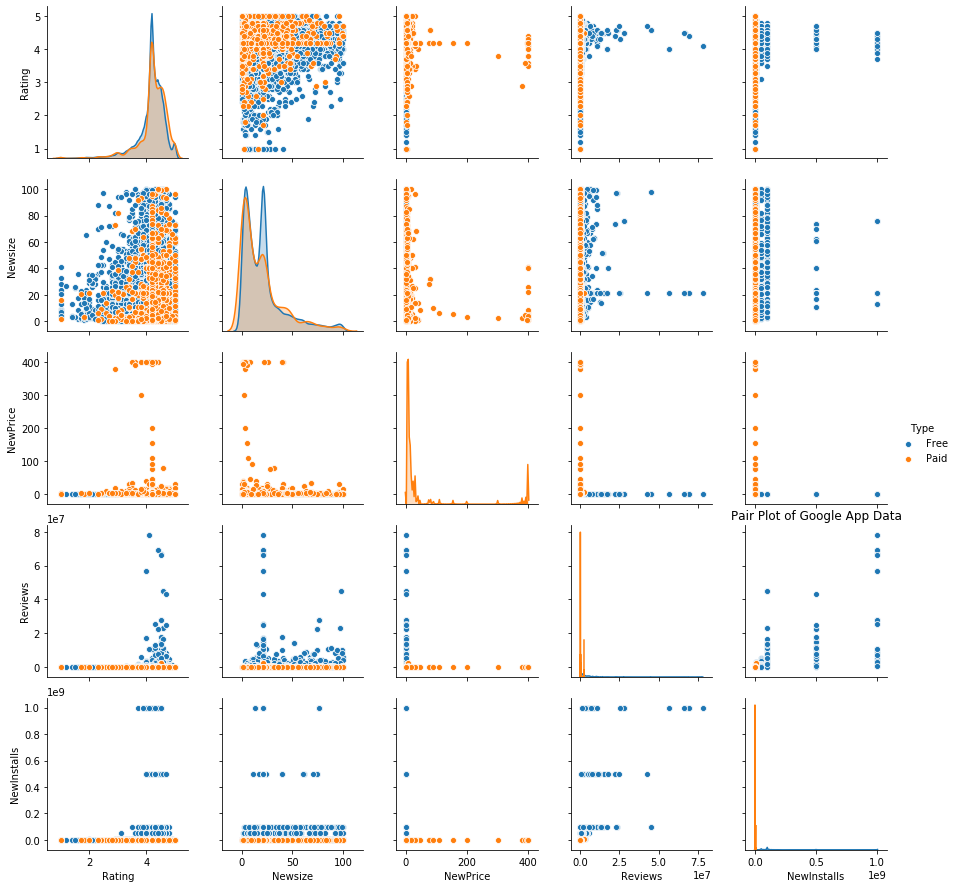

In [32]:
### lets check the correlation 
g = sns.pairplot(df_appdata7,vars=["Rating","Newsize","NewPrice","Reviews","NewInstalls"],hue = "Type")
plt.title("Pair Plot of Google App Data")
### Price, Size and Installs are highly right skewwed

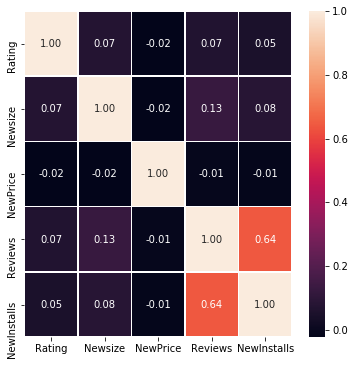

In [28]:
## lets check the correlation of all the variables in the final dataset
fig,ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(df_appdata7[["Rating","Newsize","NewPrice","Reviews","NewInstalls"]].corr(),annot=True,linewidths=.5,fmt='.2f')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()
### Reviews and Installs are correlated
### Size and Reviews are correlated

In [33]:
## Model Building to predict the Rating of an app
cols_needed = {'Rating', 'Reviews','CTG_ART_AND_DESIGN', 'CTG_AUTO_AND_VEHICLES',
       'CTG_BOOKS_AND_REFERENCE', 'CTG_BUSINESS', 'CTG_COMICS',
       'CTG_COMMUNICATION', 'CTG_DATING', 'CTG_EDUCATION', 'CTG_ENTERTAINMENT',
       'CTG_EVENTS', 'CTG_FAMILY', 'CTG_FINANCE', 'CTG_FOOD_AND_DRINK',
       'CTG_GAME', 'CTG_HEALTH_AND_FITNESS', 'CTG_HOUSE_AND_HOME',
       'CTG_LIBRARIES_AND_DEMO', 'CTG_LIFESTYLE', 'CTG_MAPS_AND_NAVIGATION',
       'CTG_MEDICAL', 'CTG_NEWS_AND_MAGAZINES', 'CTG_PARENTING',
       'CTG_PERSONALIZATION', 'CTG_PHOTOGRAPHY', 'CTG_PRODUCTIVITY',
       'CTG_SHOPPING', 'CTG_SOCIAL', 'CTG_SPORTS', 'CTG_TOOLS',
       'CTG_TRAVEL_AND_LOCAL', 'CTG_VIDEO_PLAYERS', 'CTG_WEATHER','Newsize',
       'TypeEN', 'NewPrice', 'CR_Adults only 18+', 'CR_Everyone',
       'CR_Everyone 10+', 'CR_Mature 17+', 'CR_Teen','NewInstalls'}
final_data= df_appdata7[cols_needed]
final_data.head()

,CTG_SOCIAL,CTG_WEATHER,CTG_BUSINESS,CTG_DATING,CTG_ENTERTAINMENT,CTG_VIDEO_PLAYERS,Newsize,CTG_SHOPPING,CTG_LIFESTYLE,CTG_PARENTING,CTG_FOOD_AND_DRINK,CTG_HEALTH_AND_FITNESS,Rating,CR_Teen,CTG_SPORTS,CR_Everyone 10+,Reviews,CTG_COMMUNICATION,CTG_NEWS_AND_MAGAZINES,CTG_TOOLS,TypeEN,CTG_MAPS_AND_NAVIGATION,CTG_HOUSE_AND_HOME,CTG_MEDICAL,CTG_PHOTOGRAPHY,CTG_PRODUCTIVITY,NewPrice,CTG_ART_AND_DESIGN,CTG_TRAVEL_AND_LOCAL,CTG_COMICS,CTG_BOOKS_AND_REFERENCE,CTG_EVENTS,CR_Mature 17+,CTG_FINANCE,CTG_GAME,CTG_LIBRARIES_AND_DEMO,CTG_AUTO_AND_VEHICLES,CTG_FAMILY,NewInstalls,CTG_EDUCATION,CTG_PERSONALIZATION,CR_Everyone,CR_Adults only 18+
0,0,0,0,0,0,0,19.0,0,0,0,0,0,4.1,0,0,0,159,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,10000.0,0,0,1,0
1,0,0,0,0,0,0,14.0,0,0,0,0,0,3.9,0,0,0,967,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,500000.0,0,0,1,0
2,0,0,0,0,0,0,8.7,0,0,0,0,0,4.7,0,0,0,87510,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,5000000.0,0,0,1,0
3,0,0,0,0,0,0,25.0,0,0,0,0,0,4.5,1,0,0,215644,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,50000000.0,0,0,0,0
4,0,0,0,0,0,0,2.8,0,0,0,0,0,4.3,0,0,0,967,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,100000.0,0,0,1,0


In [34]:
X = final_data.drop(labels = 'Rating',axis=1)
y = final_data['Rating']
print(X.shape)
print(y.shape)

(10829, 42)
(10829,)


In [35]:
## lets split the data into train and test for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7580, 42)
(3249, 42)
(7580,)
(3249,)


In [40]:
### Building a Baseline Model
### Predicting the target variable as one of the measure of central tendency.Lets chose mean
pred_rating_BM = np.mean(y_train)
print("Baseline Prediction for Rating:", pred_rating_BM)
y_pred_baseline = [pred_rating_BM]*3249
get_evaluation_metrics(y_test,y_pred_baseline)

Baseline Prediction for Rating: 4.191282321899668
Mean Absolute Error: 0.3198289435109416
Mean Squared Error: 0.23999844843205853
R2 value: -4.334408868711392e-06


In [41]:
### Linear Regression implementation
from sklearn.linear_model import LinearRegression
LRegressor = LinearRegression()
LRegressor.fit(X_train,y_train)
print("Value of intercept is:",LRegressor.intercept_)
print("Co-efficients are:",LRegressor.coef_)

Value of intercept is: 4.245829768673467
Co-efficients are: [ 7.82067137e-03 -9.16019114e-03 -1.00721547e-01 -1.94150578e-01
 -1.29040534e-01 -1.73936794e-01  8.74481318e-04  6.32310356e-03
 -7.64336458e-02  1.06845837e-02 -5.31840025e-02  3.13976138e-02
 -2.94418536e-02 -1.95063178e-02 -1.54625835e-02  7.69149700e-09
 -8.35589182e-02 -1.14884988e-01 -1.65800865e-01  6.93072009e-02
 -1.57913191e-01 -2.83066806e-02 -6.13427484e-02 -7.39069284e-02
 -3.42264168e-02 -1.04115383e-03  1.41570531e-01 -1.34525655e-01
 -1.52434204e-01  6.55677096e-02  1.37720282e-01 -6.36365186e-02
 -5.72623224e-02  2.00565899e-02 -3.99085597e-02 -1.14827955e-02
 -5.80160518e-02  1.45786235e-10  1.59278772e-01  6.10616490e-02
 -3.24732860e-02  3.69677136e-01]


In [42]:
y_pred_lr = LRegressor.predict(X_test)

In [43]:
#### Evalution Metrics for all models
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def get_evaluation_metrics(y_true,y_pred):
    print("Mean Absolute Error:",mean_absolute_error(y_true,y_pred))
    print("Mean Squared Error:",mean_squared_error(y_true,y_pred))
    print("R2 value:",r2_score(y_true,y_pred))

In [44]:
get_evaluation_metrics(y_test,y_pred_lr)

Mean Absolute Error: 0.3228492838207391
Mean Squared Error: 0.23335760625609805
R2 value: 0.02766614014407698


Text(0, 0.5, 'Actuals and Predictions')

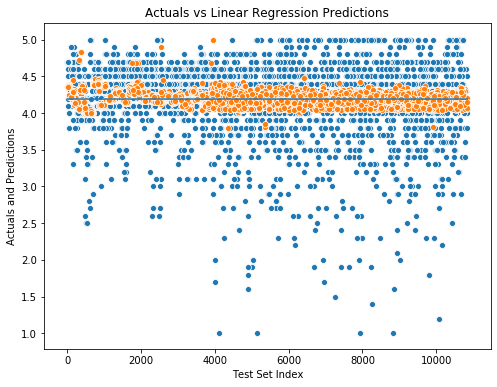

In [47]:
### Lets plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(X_test.index,y_test)
sns.scatterplot(X_test.index,y_pred_lr)
sns.lineplot(X_test.index,y_pred_baseline)
plt.title("Actuals vs Linear Regression Predictions")
plt.xlabel("Test Set Index")
plt.ylabel("Actuals and Predictions")

In [48]:
### Decision Tree Model Building
from sklearn.tree import DecisionTreeRegressor
DTreeRegressor = DecisionTreeRegressor()
DTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
y_pred_dtree = DTreeRegressor.predict(X_test)

In [50]:
y_pred_dtree

array([3.4, 4.6, 3.9, ..., 4.1, 3.3, 4.7])

In [51]:
### Evalution metrics
get_evaluation_metrics(y_test,y_pred_dtree)

Mean Absolute Error: 0.36510618651892973
Mean Squared Error: 0.35529156663588796
R2 value: -0.4803975148005415


Text(0, 0.5, 'Actuals and Predictions')

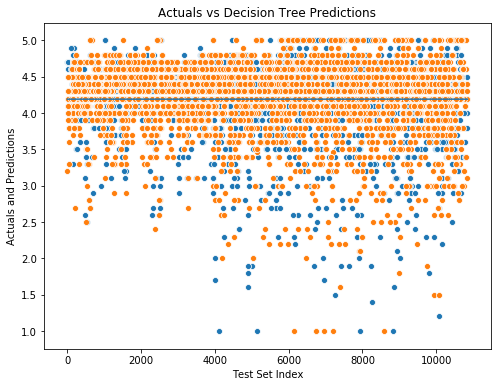

In [54]:
### Lets plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(X_test.index,y_test)
sns.scatterplot(X_test.index,y_pred_dtree)
sns.lineplot(X_test.index,y_pred_baseline)
plt.title("Actuals vs Decision Tree Predictions")
plt.xlabel("Test Set Index")
plt.ylabel("Actuals and Predictions")

In [56]:
##Random forest implementation
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,criterion='mse', random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [57]:
y_pred_RF = rf.predict(X_test)
y_pred_RF

array([3.8189 , 4.4968 , 4.116  , ..., 3.8943 , 3.83419, 4.66072])

In [58]:
### Evalution metrics
get_evaluation_metrics(y_test,y_pred_RF)

Mean Absolute Error: 0.2923870007865668
Mean Squared Error: 0.21084018709469388
R2 value: 0.12148973320567957


Text(0, 0.5, 'Actuals and Predictions')

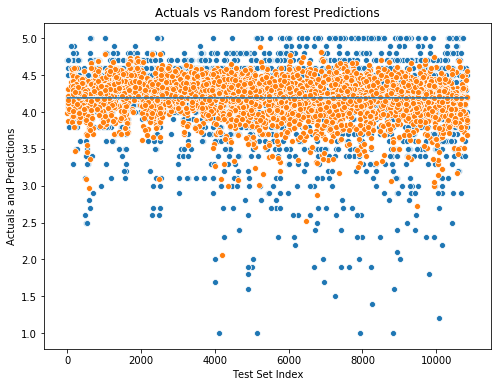

In [61]:
### Lets plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(X_test.index,y_test)
sns.scatterplot(X_test.index,y_pred_RF)
sns.lineplot(X_test.index,y_pred_baseline)
plt.title("Actuals vs Random forest Predictions")
plt.xlabel("Test Set Index")
plt.ylabel("Actuals and Predictions")